In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def schwefel(x):
    y = 0
    for i in range(len(x)):
        y += -x[i] * np.sin(np.sqrt(np.abs(x[i])))
    return y

def gradient_descent(func, init, eta=0.01, max_iter=1000, tol=1e-6):
    x = init
    n_iter = 0
    while n_iter < max_iter:
        grad = np.zeros_like(x)
        for i in range(len(x)):
            e = np.zeros_like(x)
            e[i] = 1e-4
            grad[i] = (func(x + e) - func(x - e)) / (2 * e[i])
        x_new = x - eta * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        n_iter += 1
    return x_new, func(x_new), n_iter

# Generar condición inicial aleatoria en 2D
x0_2d = np.random.uniform(low=-500, high=500, size=2)

print(x0_2d)

# Ejecutar el descenso por gradiente en 2D
x_opt_2d, y_opt_2d, n_iter_2d = gradient_descent(schwefel, x0_2d)

# Generar condición inicial aleatoria en 3D
x0_3d = np.random.uniform(low=-500, high=500, size=3)
print(x0_3d)
# Ejecutar el descenso por gradiente en 3D
x_opt_3d, y_opt_3d, n_iter_3d = gradient_descent(schwefel, x0_3d)

[ -97.69287398 -309.52950542]
[ 37.47857771 435.19055804  43.194892  ]


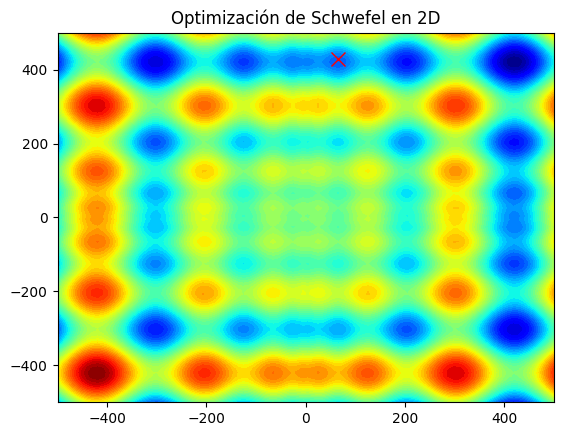

In [9]:
# Visualizar la función y la trayectoria de optimización en 2D
x = np.linspace(-500, 500, 100)
y = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = schwefel([X[i,j], Y[i,j]])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z, 50, cmap='jet')
ax.plot(x_opt_2d[0], x_opt_2d[1], 'rx', markersize=10)
plt.title('Optimización de Schwefel en 2D')
plt.show()

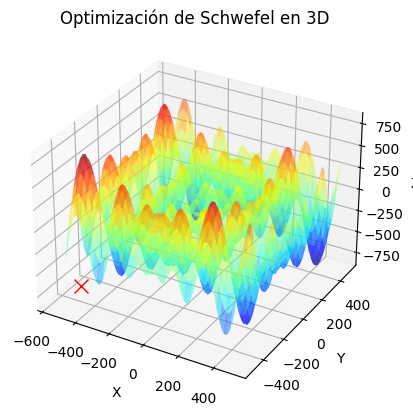

In [12]:
x = np.linspace(-500, 500, 100)
y = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = schwefel([X[i,j], Y[i,j]])

# Crear la figura y el subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)

# Graficar la trayectoria de optimización
ax.plot([x_opt_3d[0]], [x_opt_3d[1]], [y_opt_3d], 'rx', markersize=10)

# Configurar los ejes y el título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Optimización de Schwefel en 3D')

# Mostrar la figura
plt.show()

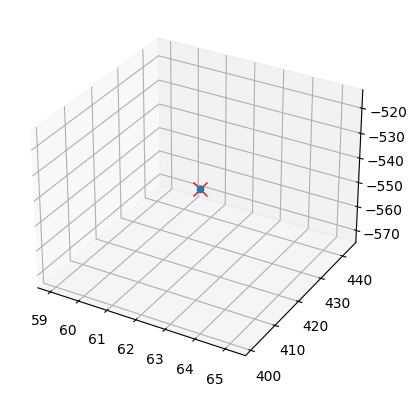

In [16]:
# Visualizar la función y la trayectoria de optimización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter([x_opt_3d[0]], [x_opt_3d[1]], [y_opt_3d], cmap='jet')

ax.plot([x_opt_3d[0]], [x_opt_3d[1]], [y_opt_3d], 'rx', markersize=10)